In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Load the IMDB dataset
imdb = tf.keras.datasets.imdb
# Download and load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
np.unique(y_train) # Binary classification

array([0, 1])

In [4]:
# Get the word_index
word_index = imdb.get_word_index()

# Create the word2idx and idx2word functions
word2idx = tf.keras.datasets.imdb.get_word_index()
idx2word = {index: word for word, index in word2idx.items()}


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# indcies 0,1,2 are resrved for special tokens , so we shift 3 i

' '.join([idx2word.get(i-3 , '?') for i in x_train[1]])

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [17]:
vocab_size = 10000
embed_size = 128
epochs = 5
batch_size = 64
max_seq_len = 300


In [18]:
# Preprocess the data
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_seq_len, padding='post', truncating='post', value=0)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_seq_len, padding='post', truncating='post', value=0)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_size),
    tf.keras.layers.GRU(64, return_sequences=True),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model(tf.zeros((1, max_seq_len), dtype=tf.int32))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (1, 300, 128)               │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (1, 300, 64)                │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (1, 32)                     │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (1, 16)                     │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (1, 1)                      │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,327,201 (5.06 MB)

 Trainable params: 1,327,201 (5.06 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.5081 - loss: 0.6936 - val_accuracy: 0.5226 - val_loss: 0.6915
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.5474 - loss: 0.6772 - val_accuracy: 0.5084 - val_loss: 0.6924
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.6276 - loss: 0.6182 - val_accuracy: 0.8590 - val_loss: 0.3558
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 166ms/step - accuracy: 0.9006 - loss: 0.2611 - val_accuracy: 0.8828 - val_loss: 0.2908
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 136ms/step - accuracy: 0.9556 - loss: 0.1356 - val_accuracy: 0.8490 - val_loss: 0.4140


In [21]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.3026
Test Accuracy: 0.8762


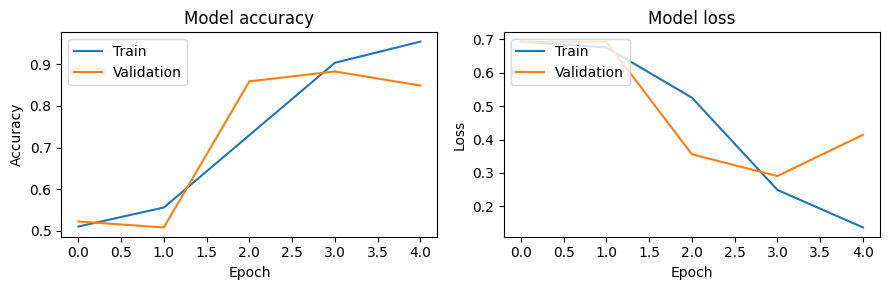

In [22]:
# prompt: visualize the history and the accuracy in subplots

fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [24]:
joblib.dump(word2idx, "word2idx.joblib") # Pass the 'word2idx' variable as the first argument to the dump function.
model.save("model.keras")

* `Inference`

In [25]:
Positive_Text = [
    "This movie was absolutely fantastic!\nThe plot was gripping from the very beginning,\nthe pacing was perfect, and the acting was top-notch throughout the entire film.\nI was completely immersed in the story and emotionally connected to the characters.",
    "A beautiful and emotional story that truly touched my heart.\nThe cinematography was breathtaking,\nthe musical score elevated every scene,\nand the performances were deeply moving.\nI loved every minute and would definitely watch it again.",
    "An outstanding film that deserves all the praise it has received.\nThe direction was flawless,\nthe script was clever and insightful,\nand each actor brought their character to life in a compelling way.\nHighly recommended for fans of intelligent storytelling."
]


Negative_Text = [
    "What a waste of time.\nThe story was painfully slow,\nthe characters were poorly developed,\nand the acting felt forced and unnatural.\nI kept hoping it would get better,\nbut it just got worse with each passing scene.",
    "This was one of the worst movies I’ve ever seen.\nThe plot made no sense,\nthe editing was choppy,\nand the dialogue was cringeworthy.\nI couldn’t even finish it because it was so frustrating to watch.",
    "Poorly written, badly directed, and not entertaining at all.\nThe film dragged on with endless scenes that added nothing to the story,\nand the performances were completely uninspired.\nA total disappointment from start to finish."
]


Neutral_Text = [
    "The movie had some good moments,\nespecially in the first half,\nbut overall it didn’t meet my expectations.\nWhile some scenes were well-executed,\nothers felt flat,\nand the story lacked the emotional depth I was hoping for.",
    "Great visuals,\nespecially the landscape shots and lighting design,\nbut the story was lacking depth\nand the characters weren’t particularly memorable.\nIt’s one of those films that looks better than it feels.",
    "It was okay.\nNot great,\nnot terrible,\njust average.\nThere were a few clever ideas and decent performances,\nbut it didn’t do much to stand out from other movies in the same genre.\nIt left me feeling indifferent."
]



In [26]:
def inference(text:str , clf):
  # encode the text
  encoded_text = [word2idx.get(word,'?') for word in text.split()]
  #preprocessing
  preprocessed_text = tf.keras.preprocessing.Sequence.pad_sequence([encoded_text], maxlen=max_seq_len, padding='post', truncating='post', value=0)
  # prediction
  # predicion = [1 if clf.predict(preprocessed_text[0][0]) > 0.5 else 0]
  predicion = [1 if clf.predict(preprocessed_text) > 0.5 else 0]
  return predicion[0]